In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
laptop = pd.read_csv('/content/cleaned_laptop_data (1).csv')

In [3]:
laptop.head(2)

,Product Name,Rating,Price,Discount in Percent,Price Before Discount,Processor Brand,Processor Name,SSD,SSD Capacity,RAM,RAM Type,Processor Variant,Graphic Processor,Storage Type,Ratings Count,Reviews Count,Brand
0,Acer Aspire 7 Intel Core i5 13th Gen 13420H - ...,4.3,51990,38.0,84999.0,Intel,Core i5,Yes,512,16 GB,DDR4,13420H,NVIDIA GeForce RTX 2050,SSD,1558.0,117.0,Acer
1,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,18990,52.0,39990.0,Intel,Celeron Dual Core,Yes,256,8 GB,DDR5,N4020,Intel Integrated UHD,SSD,1151.0,133.0,CHUWI


In [4]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product Name           503 non-null    object 
 1   Rating                 446 non-null    float64
 2   Price                  503 non-null    int64  
 3   Discount in Percent    496 non-null    float64
 4   Price Before Discount  503 non-null    float64
 5   Processor Brand        503 non-null    object 
 6   Processor Name         503 non-null    object 
 7   SSD                    503 non-null    object 
 8   SSD Capacity           503 non-null    object 
 9   RAM                    503 non-null    object 
 10  RAM Type               503 non-null    object 
 11  Processor Variant      503 non-null    object 
 12  Graphic Processor      503 non-null    object 
 13  Storage Type           503 non-null    object 
 14  Ratings Count          503 non-null    float64
 15  Review

In [5]:
laptop['Rating'] = laptop['Rating'].fillna(0)
laptop['RAM'] = laptop['RAM'].str.replace('GB', '').astype(int)

In [6]:
df = laptop.copy()

# **Data Analysis of Laptop Dataset**

Q 1. What is the average rating of products in the dataset?

In [7]:
df.head(2)

,Product Name,Rating,Price,Discount in Percent,Price Before Discount,Processor Brand,Processor Name,SSD,SSD Capacity,RAM,RAM Type,Processor Variant,Graphic Processor,Storage Type,Ratings Count,Reviews Count,Brand
0,Acer Aspire 7 Intel Core i5 13th Gen 13420H - ...,4.3,51990,38.0,84999.0,Intel,Core i5,Yes,512,16,DDR4,13420H,NVIDIA GeForce RTX 2050,SSD,1558.0,117.0,Acer
1,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,18990,52.0,39990.0,Intel,Celeron Dual Core,Yes,256,8,DDR5,N4020,Intel Integrated UHD,SSD,1151.0,133.0,CHUWI


In [8]:
df['Rating'].mean()

3.704174950298211

Q 2. Is there a correlation between product price and rating?

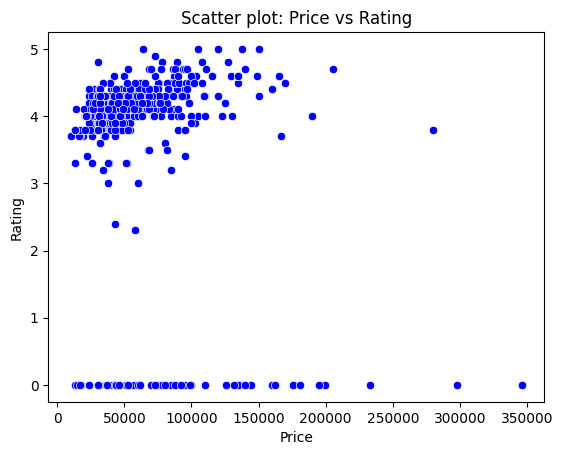

In [9]:
sns.scatterplot(data=df, x='Price', y='Rating', color='blue')
plt.title('Scatter plot: Price vs Rating')
plt.show()

Q 3. What is the distribution of product prices?

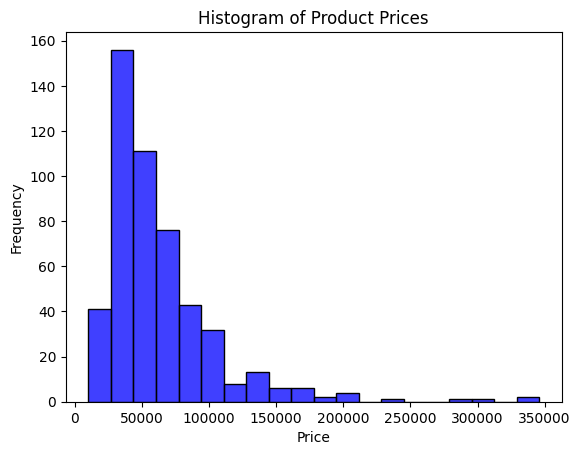

In [10]:
sns.histplot(df['Price'], kde=False, color='blue', bins=20)  # You can adjust the number of bins
plt.title('Histogram of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Q 4. What is the average discount percent?

In [11]:
df['Discount in Percent'].mean()

29.336693548387096

Q 5. How does the discount percentage affect the final price of products?

In [73]:
df['Final Price'] = df['Price'] * (1 - df['Discount in Percent'] / 100)

In [75]:
print(df[['Price', 'Discount in Percent', 'Final Price']].head())

   Price  Discount in Percent  Final Price
0  51990                 38.0      32233.8
1  18990                 52.0       9115.2
2  47990                 23.0      36952.3
3  56990                 22.0      44452.2
4  32990                 35.0      21443.5


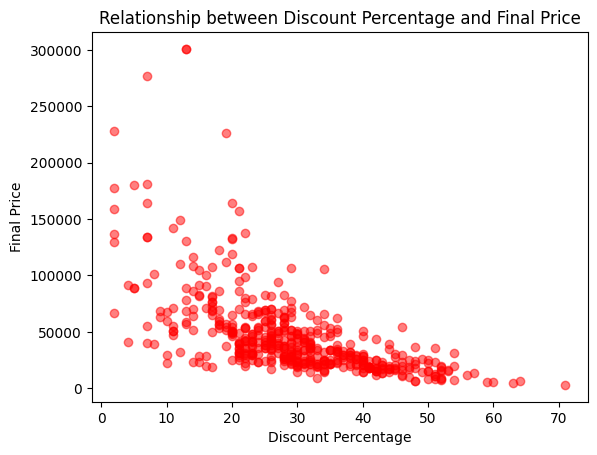

In [76]:
plt.scatter(df['Discount in Percent'], df['Final Price'], alpha=0.5, color='red')
plt.xlabel('Discount Percentage')
plt.ylabel('Final Price')
plt.title('Relationship between Discount Percentage and Final Price')
plt.show()

Q 6. What is the most common processor brand across products?

In [13]:
df.head(2)

,Product Name,Rating,Price,Discount in Percent,Price Before Discount,Processor Brand,Processor Name,SSD,SSD Capacity,RAM,RAM Type,Processor Variant,Graphic Processor,Storage Type,Ratings Count,Reviews Count,Brand
0,Acer Aspire 7 Intel Core i5 13th Gen 13420H - ...,4.3,51990,38.0,84999.0,Intel,Core i5,Yes,512,16,DDR4,13420H,NVIDIA GeForce RTX 2050,SSD,1558.0,117.0,Acer
1,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,3.7,18990,52.0,39990.0,Intel,Celeron Dual Core,Yes,256,8,DDR5,N4020,Intel Integrated UHD,SSD,1151.0,133.0,CHUWI


In [19]:
df['Processor Brand'].value_counts().head(1)

,count
Processor Brand,
Intel,367


Q 7. Which processor name is most frequently used in the products?

In [21]:
df['Processor Name'].value_counts().head(1)

,count
Processor Name,
Core i5,149


Q 8. How do the number of ratings and reviews correlate with the product rating?

In [23]:
selected_columns = df[['Rating', 'Ratings Count', 'Reviews Count']]
correlation_matrix = selected_columns.corr()

In [24]:
correlation_matrix

,Rating,Ratings Count,Reviews Count
Rating,1.000000,0.178215,0.187415
Ratings Count,0.178215,1.000000,0.973783
Reviews Count,0.187415,0.973783,1.000000


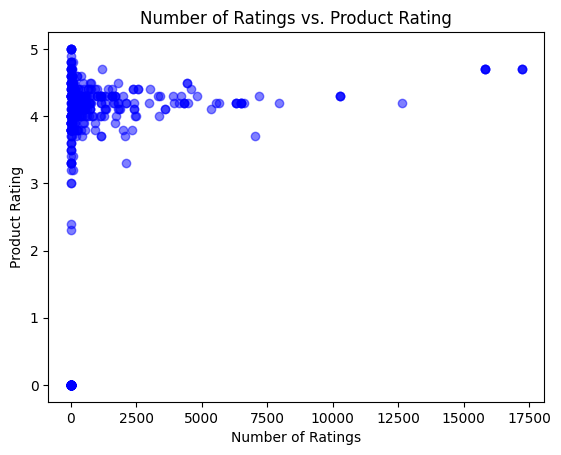

In [26]:
import matplotlib.pyplot as plt

# Ratings vs. Product Rating
plt.scatter(df['Ratings Count'], df['Rating'], alpha=0.5, color='blue')
plt.xlabel("Number of Ratings")
plt.ylabel("Product Rating")
plt.title("Number of Ratings vs. Product Rating")
plt.show()


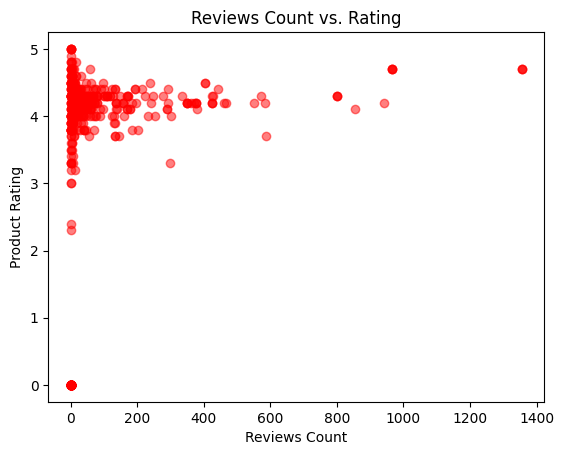

In [27]:
plt.scatter(df['Reviews Count'], df['Rating'], alpha=0.5, color='red')
plt.xlabel("Reviews Count")
plt.ylabel("Product Rating")
plt.title("Reviews Count vs. Rating")
plt.show()

Q 9. What is the relationship between product price and RAM size?

In [28]:
correlation_matrix = df[['Price', 'RAM']].corr()
print(correlation_matrix)

          Price       RAM
Price  1.000000  0.754863
RAM    0.754863  1.000000


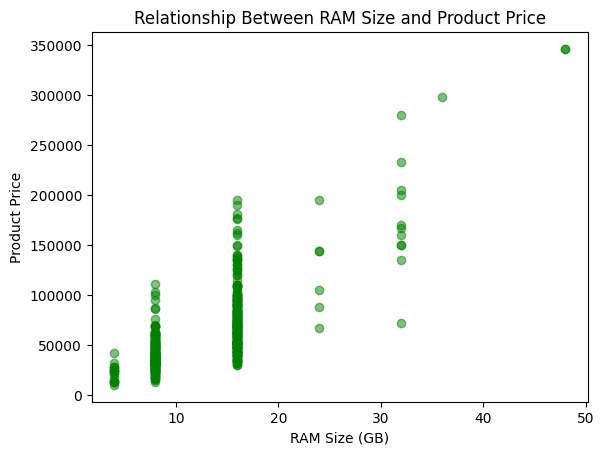

In [30]:
plt.scatter(df['RAM'], df['Price'], alpha=0.5, color='green')
plt.xlabel("RAM Size (GB)")
plt.ylabel("Product Price")
plt.title("Relationship Between RAM Size and Product Price")
plt.show()

Q 10. What is the most common SSD capacity across the products?

In [32]:
df['SSD Capacity'].value_counts().head(2)

,count
SSD Capacity,
512,353
1024.0,82


Q 11. How does SSD capacity influence product price and rating?

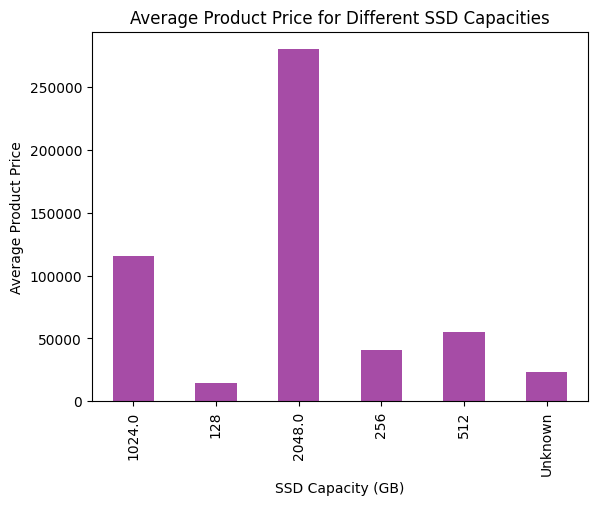

In [36]:
avg_price_by_ssd = df.groupby('SSD Capacity')['Price'].mean()

# Create a bar plot
avg_price_by_ssd.plot(kind='bar', color='purple', alpha=0.7)
plt.xlabel("SSD Capacity (GB)")
plt.ylabel("Average Product Price")
plt.title("Average Product Price for Different SSD Capacities")
plt.show()

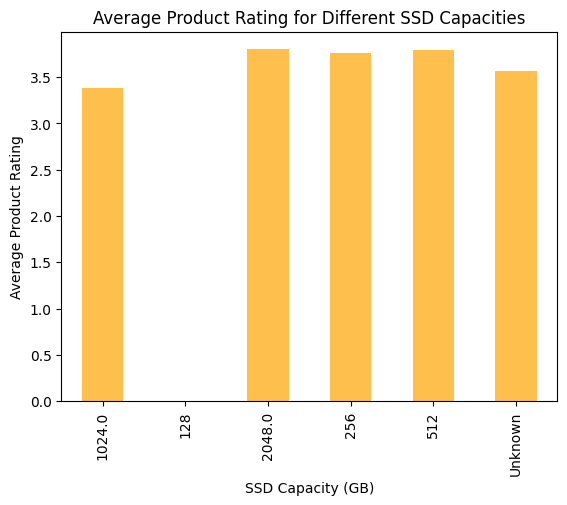

In [38]:
avg_rating_by_ssd = df.groupby('SSD Capacity')['Rating'].mean()

# Create a bar plot
avg_rating_by_ssd.plot(kind='bar', color='orange', alpha=0.7)
plt.xlabel("SSD Capacity (GB)")
plt.ylabel("Average Product Rating")
plt.title("Average Product Rating for Different SSD Capacities")
plt.show()

Q 12. What is the relationship between processor variant (e.g., i5, i7) and product price?

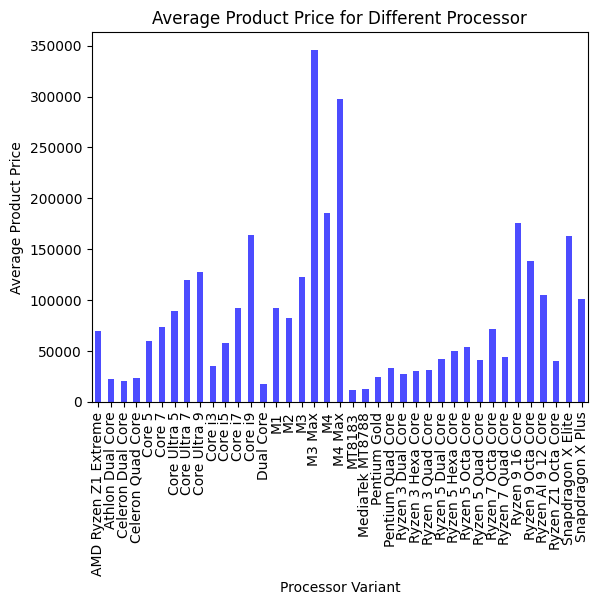

In [41]:
avg_price_by_processor = df.groupby('Processor Name')['Price'].mean()

# Create a bar plot
avg_price_by_processor.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel("Processor Variant")
plt.ylabel("Average Product Price")
plt.title("Average Product Price for Different Processor")
plt.show()

Q 14. What is the average price of products with different RAM types (e.g., DDR4)?

In [49]:
avg_price_by_ram_type = df.groupby('RAM Type')['Price'].mean()
avg_price_by_ram_type.sort_values(ascending=False)

,Price
RAM Type,
Unified Memory,159050.666667
LPDDR5X,108347.659574
DDR5,97332.822581
LPDDR5,53345.150000
LPDDR4X,48281.034483
DDR4,46683.117021
LPDDR4,25752.250000


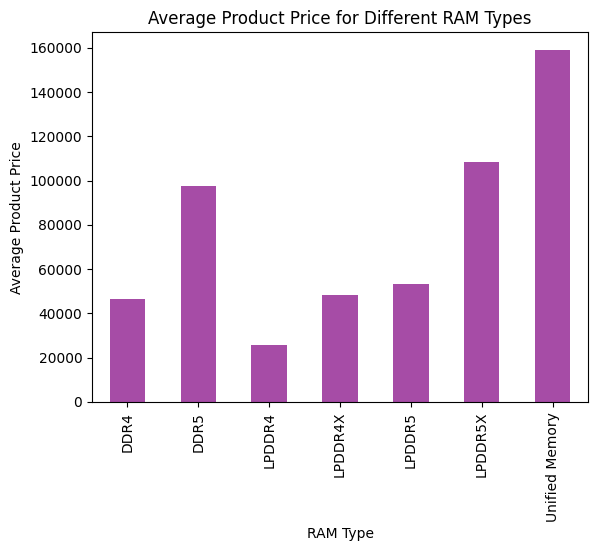

In [47]:
avg_price_by_ram_type = df.groupby('RAM Type')['Price'].mean()

# Create a bar plot
avg_price_by_ram_type.plot(kind='bar', color='purple', alpha=0.7)
plt.xlabel("RAM Type")
plt.ylabel("Average Product Price")
plt.title("Average Product Price for Different RAM Types")
plt.show()

Q 15. Which product brands have the highest average ratings?

In [44]:
avg_rating_by_brand = df.groupby('Brand')['Rating'].mean()

# Sort the results in descending order to get brands with the highest average ratings
avg_rating_by_brand = avg_rating_by_brand.sort_values(ascending=False)

In [46]:
avg_rating_by_brand.head(1)

,Rating
Brand,
SAMSUNG,4.457143


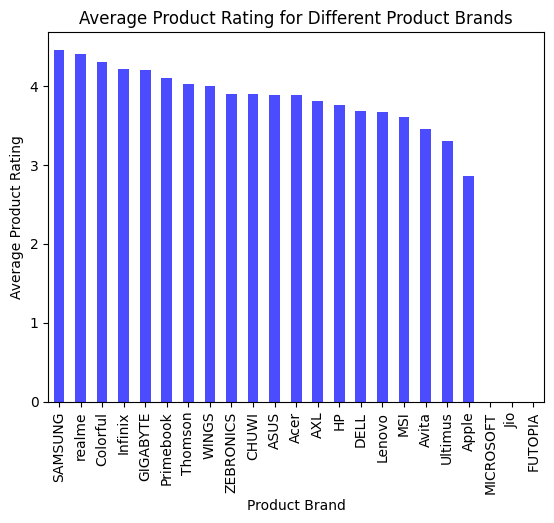

In [50]:
avg_rating_by_brand.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel("Product Brand")
plt.ylabel("Average Product Rating")
plt.title("Average Product Rating for Different Product Brands")
plt.show()

Q 16. How does the brand impact the average rating and price?

In [52]:
avg_rating_price_by_brand = df.groupby('Brand').agg({
    'Rating': 'mean',  # Average rating for each brand
    'Price': 'mean'    # Average price for each brand
})

# Sort the results by average price to see the brands with highest and lowest prices
avg_rating_price_by_brand = avg_rating_price_by_brand.sort_values(by='Price', ascending=False)
avg_rating_price_by_brand

,Rating,Price
Brand,,
MICROSOFT,0.000000,149704.285714
Apple,2.855556,147868.888889
SAMSUNG,4.457143,96705.714286
MSI,3.603333,73858.166667
GIGABYTE,4.200000,66990.000000
Lenovo,3.668421,65023.231579
realme,4.400000,64999.000000
Colorful,4.300000,61656.666667
ASUS,3.887500,61295.781250


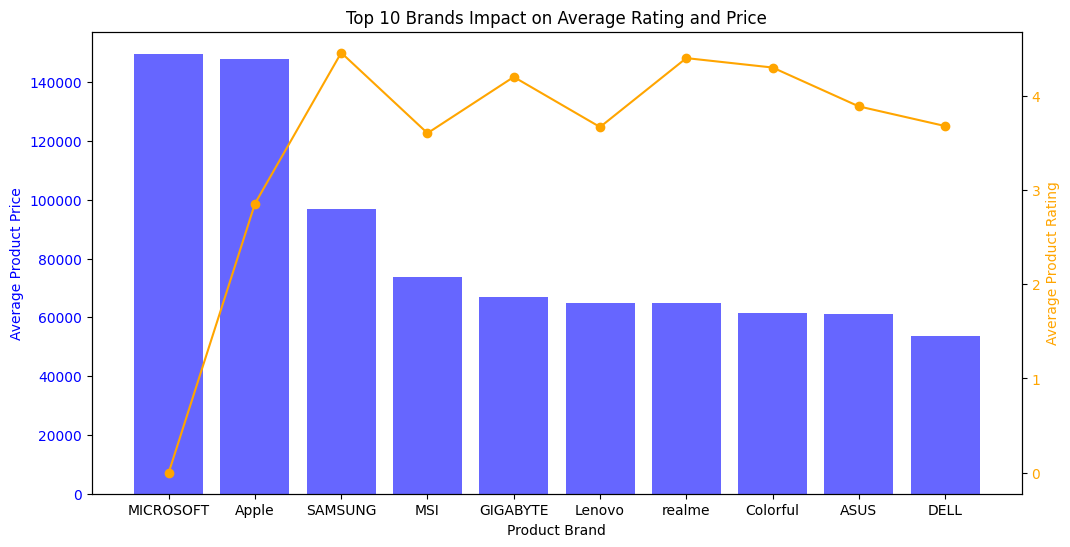

In [55]:
# Limit to the top 10 brands with highest average price
top_10_brands = avg_rating_price_by_brand.head(10)

# Plot the top 10 brands
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average price
ax1.bar(top_10_brands.index, top_10_brands['Price'], color='blue', alpha=0.6)
ax1.set_xlabel('Product Brand')
ax1.set_ylabel('Average Product Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line plot for average rating (on the same x-axis)
ax2 = ax1.twinx()
ax2.plot(top_10_brands.index, top_10_brands['Rating'], color='orange', marker='o')
ax2.set_ylabel('Average Product Rating', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Top 10 Brands Impact on Average Rating and Price')
plt.xticks(rotation=90)
plt.show()

Q 17. What is the distribution of storage types (SSD vs. HDD) in the dataset?

In [56]:
storage_distribution = df['Storage Type'].value_counts()
storage_distribution

,count
Storage Type,
SSD,487
eMMC,9
HDD,5
Hybrid,1
UFS,1


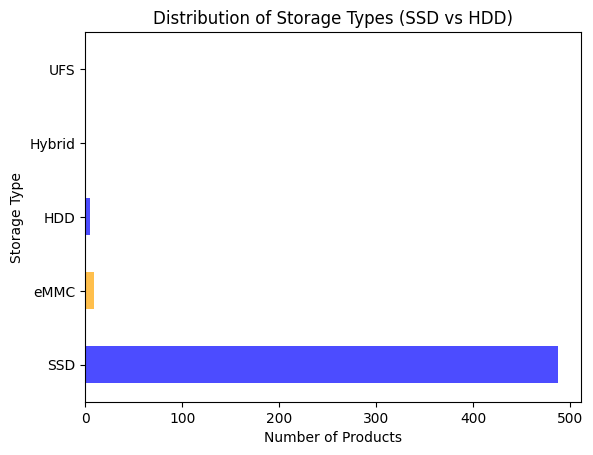

In [58]:
storage_distribution.plot(kind='barh', color=['blue', 'orange'], alpha=0.7)
plt.xlabel("Number of Products")
plt.ylabel("Storage Type")
plt.title("Distribution of Storage Types (SSD vs HDD)")
plt.show()

Q 18. What is the correlation between the number of reviews and product price?

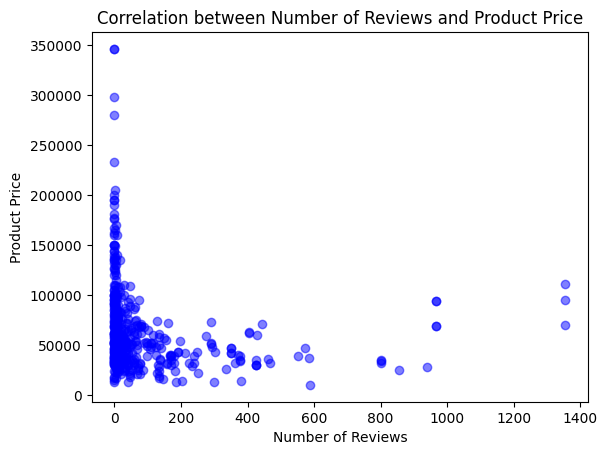

In [60]:
plt.scatter(df['Reviews Count'], df['Price'], alpha=0.5, color='blue')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Price')
plt.title('Correlation between Number of Reviews and Product Price')
plt.show()

In [61]:
correlation = df['Reviews Count'].corr(df['Price'])

print(f"Pearson correlation coefficient between Number of Reviews and Product Price: {correlation}")

Pearson correlation coefficient between Number of Reviews and Product Price: -0.12416838556363259


In [ ]:
# A negative correlation suggests that products with more reviews might have a lower price.

Q 19. Which processor brand has the highest average rating?

In [67]:
avg_rating_by_processor_brand = df.groupby('Processor Brand')['Rating'].mean()

# Sort the results in descending order to get the processor brand with the highest average rating
highest_avg_rating_processor = avg_rating_by_processor_brand.sort_values(ascending=False).head(1)

In [68]:
highest_avg_rating_processor

,Rating
Processor Brand,
AMD,3.889623


Q 20. What is the relationship between product rating and the number of reviews (ratings count)?

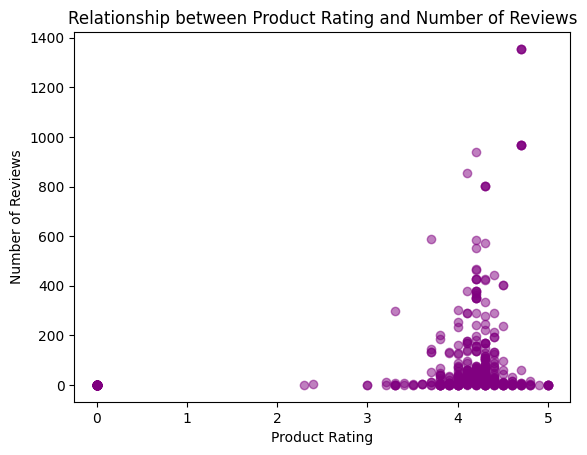

In [69]:
plt.scatter(df['Rating'], df['Reviews Count'], alpha=0.5, color='purple')
plt.xlabel('Product Rating')
plt.ylabel('Number of Reviews')
plt.title('Relationship between Product Rating and Number of Reviews')
plt.show()

In [70]:
correlation = df['Rating'].corr(df['Reviews Count'])

print(f"Pearson correlation coefficient between Product Rating and Number of Reviews: {correlation}")

Pearson correlation coefficient between Product Rating and Number of Reviews: 0.18741526616268622
